In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files


In [181]:
#uploaded = files.upload()

In [182]:
archivo_csv  = 'pokemon.csv'
df = pd.read_csv(archivo_csv)

In [183]:
df

,Nombre,Tipo,Total,Vida,Ataque,Defensa,Ataque_Esp,Defense_Esp,Velocidad
0,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
1204,Gouging Fire,Fire Dragon,590,105,115,121,65,93,91
1205,Raging Bolt,Electric Dragon,590,125,73,91,137,89,75
1206,Iron Boulder,Rock Psychic,590,90,120,80,68,108,124
1207,Iron Crown,Steel Psychic,590,90,72,100,122,108,98


In [184]:
#Promedios de Stats
df.mean()

<ipython-input-184-492bc7ecf47f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Total          442.367246
Vida            71.115798
Ataque          81.019024
Defensa         74.856907
Ataque_Esp      73.172043
Defense_Esp     72.307692
Velocidad       69.895782
dtype: float64

In [185]:
df1 = pd.DataFrame({'Tipo': df['Tipo'].unique()})
df1['Cantidad'] = df['Tipo'].value_counts().values

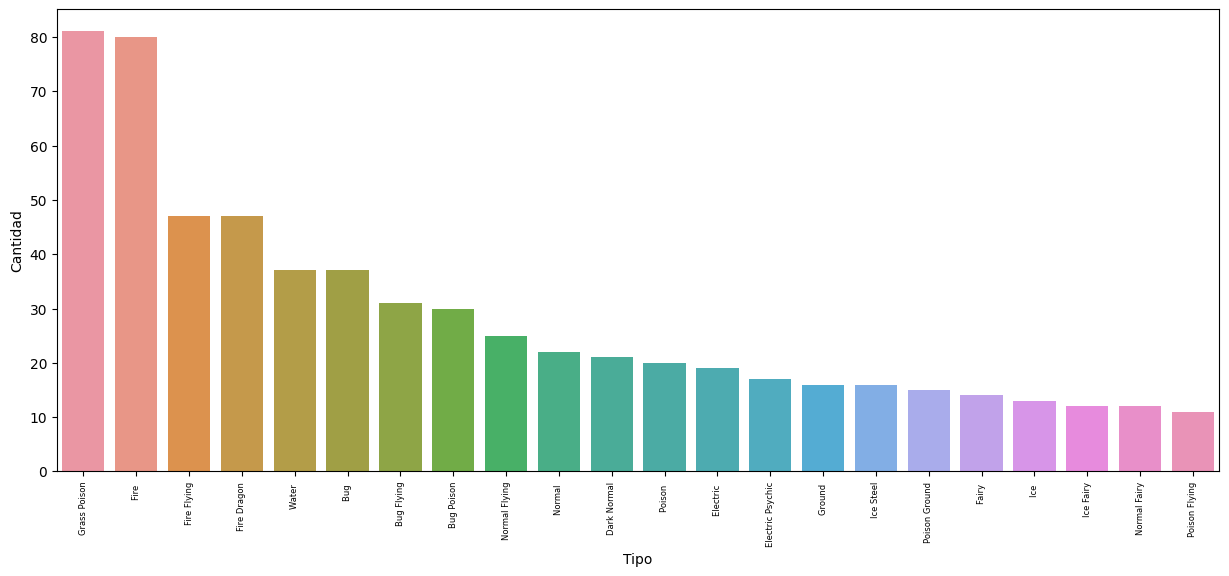

In [186]:
#Cantidad de Tipos de pokemon
df_filtrado = df1[df1['Cantidad'] > 10]
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Tipo', y='Cantidad', data=df_filtrado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=6)

In [187]:
df_sorted = df.sort_values(by='Total', ascending=False)
top_10_Masfuertes = df_sorted.head(10)[['Nombre','Tipo', 'Total', 'Ataque', 'Defensa', 'Ataque_Esp', 'Defense_Esp', 'Velocidad']]
top_10_Masfuertes

,Nombre,Tipo,Total,Ataque,Defensa,Ataque_Esp,Defense_Esp,Velocidad
1058,Eternatus Eternamax,Poison Dragon,1125,115,250,125,250,130
475,Rayquaza Mega Rayquaza,Dragon Flying,780,180,100,180,100,115
202,Mewtwo Mega Mewtwo Y,Psychic,780,150,70,194,120,140
201,Mewtwo Mega Mewtwo X,Psychic Fighting,780,190,100,154,100,130
471,Kyogre Primal Kyogre,Water,770,150,90,180,160,90
473,Groudon Primal Groudon,Ground Fire,770,180,160,150,90,90
961,Necrozma Ultra Necrozma,Psychic Dragon,754,167,97,167,97,129
605,Arceus,Normal,720,120,120,120,120,120
865,Zygarde Complete Forme,Dragon Ground,708,100,121,91,95,85
776,Kyurem White Kyurem,Dragon Ice,700,120,90,170,100,95


In [212]:
df_sorted = df.sort_values(by='Total')
top_10_Masdebiles= df_sorted.head(10)[['Nombre','Tipo', 'Total', 'Ataque', 'Defensa', 'Ataque_Esp', 'Defense_Esp', 'Velocidad']]
top_10_Masdebiles

,Nombre,Tipo,Total,Ataque,Defensa,Ataque_Esp,Defense_Esp,Velocidad
902,Wishiwashi Solo Form,Water,175,20,20,25,25,40
245,Sunkern,Grass,180,30,30,30,30,30
985,Blipbug,Bug,180,20,20,25,45,45
1034,Snom,Ice Bug,185,25,35,45,30,20
368,Azurill,Normal Fairy,190,20,40,20,40,20
495,Kricketot,Bug,194,25,41,25,41,25
13,Caterpie,Bug,195,30,35,20,20,45
334,Wurmple,Bug,195,45,35,20,30,20
16,Weedle,Bug Poison,195,35,30,20,20,50
349,Ralts,Psychic Fairy,198,25,25,45,35,40


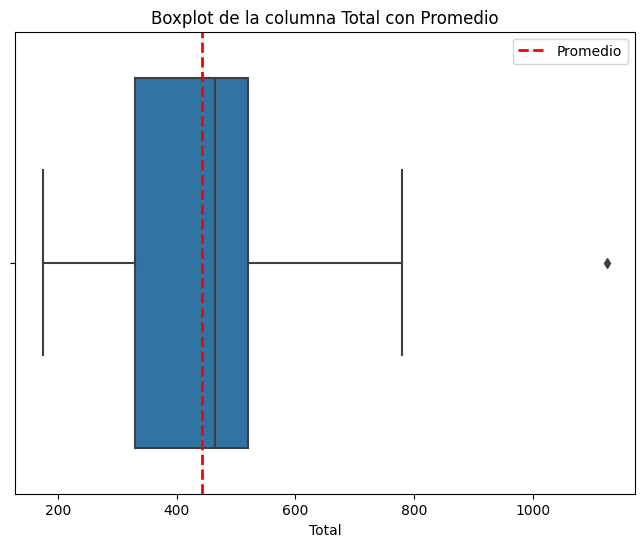

In [188]:
# Calcular el valor promedio de la columna 'Total'
promedio_total = df['Total'].mean()

# Crear un gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total'])
plt.axvline(promedio_total, color='red', linestyle='dashed', linewidth=2, label='Promedio')

plt.legend()
plt.title('Boxplot de la columna Total con Promedio')
plt.show()

# Claramente el unico outliers es el pokemon Nro 1058	Eternatus Eternamax	con	1125 del total de poder

<ipython-input-189-b25995926b43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


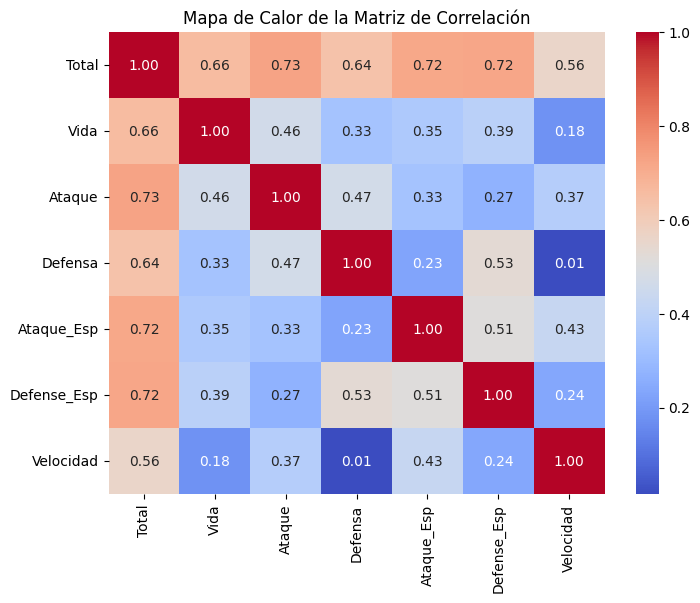

In [189]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor de la Matriz de Correlación')

plt.show()
#no existe correlaciones fuertemente ligadas entre las variables

In [205]:
print("Número total de filas antes de eliminar:", len(df))

# Eliminar las filas con "Total" mayor a 700
df = df[df['Total'] <= 600]

# Imprimir el número total de filas después de eliminar
print("Número total de filas después de eliminar:", len(df))

#Para evitar tanta la varianza de los pokemon normales a los legendarios

Número total de filas antes de eliminar: 1140
Número total de filas después de eliminar: 1140


In [222]:
nombres_pokemon = [
    "Zephyrion",
    "Aquilix",
    "Igniferno",
    "Florafira",
    "Terrador",
    "Mystiqua",
    "Voltara",
    "Glaciana",
    "Pyroclaw",
    "Aerion",
    "Hydronix",
    "Leafshade",
    "Frostbite",
    "Pyroflare",
    "Aquaquill",
    "Tornadrix",
    "Rockspire",
    "Thundertail",
    "Magmaflare",
    "Aurorafrost",
    "Dracothorn",
    "Sylvanflare",
    "Galaxiwing",
    "Infernosurge",
    "Aerodrake",
    "Tidalsurge",
    "Solarflare",
    "Lunarwhisper",
    "Mysticshade",
    "Thunderstorm",
    "Auroraflash",
    "Verdantflare",
    "Magmaraider",
    "Zephyrstorm",
    "Aquanox",
    "Flamequill",
    "Terraflare",
    "Cycloneclaw",
    "Vortexblade",
    "Blazeclaw",
    "Frostfang",
    "Quakestrike",
    "Thunderstrike",
    "Solarflare",
    "Lunarwhisper",
    "Mysticshade",
    "Thunderstorm",
    "Auroraflash",
    "Verdantflare",
    "Magmaraider",
    "Zephyrstorm",
    "Aquanox",
    "Flamequill",
    "Terraflare",
    "Cycloneclaw",
    "Vortexblade",
    "Blazeclaw",
    "Frostfang",
    "Quakestrike",
    "Thunderstrike",
]


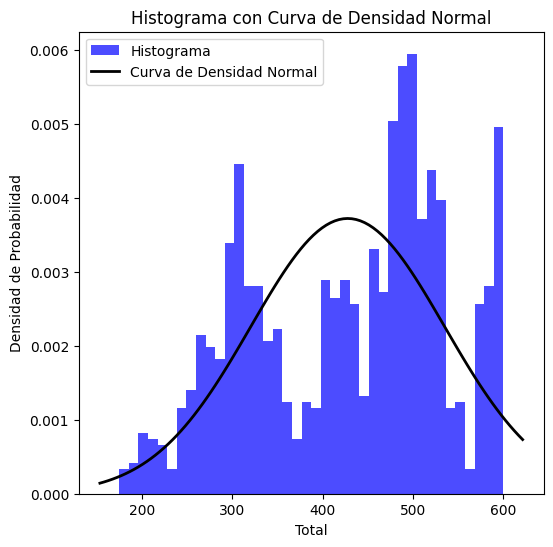

In [198]:
from scipy.stats import norm

# Supongamos que tu DataFrame se llama df y contiene las estadísticas de los Pokémon
datos = df['Total']

# Crear el histograma
plt.figure(figsize=(6, 6))
plt.hist(datos, bins=40, color="b", density=True, alpha=0.7, label='Histograma')

# Ajustar una curva de densidad normal
media, desviacion_estandar = norm.fit(datos)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion_estandar)

# Superponer la curva de densidad normal sobre el histograma
plt.plot(x, p, 'k', linewidth=2, label='Curva de Densidad Normal')

# Etiquetas y título
plt.xlabel('Total')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma con Curva de Densidad Normal')

# Mostrar leyenda
plt.legend()

plt.show()

In [209]:

# Supongamos que 'datos' es tu serie de datos
datos = df['Total']

# Calcular la desviación estándar y la varianza
desviacion_estandar = np.std(datos)
varianza = np.var(datos)
Promedio = np.mean(datos)

print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Varianza: {varianza}")
print(f"Promedio: {Promedio}")

Desviación Estándar: 107.2874259451124
Varianza: 11510.591765927978
Promedio: 427.7815789473684


In [223]:
import random

desviacion_estandar = 120.9313011812886
varianza = 14624.379605399536
promedio = 442.3672456575682

#pesos para cada habilidad (ajusta según tus preferencias)
pesos_habilidades = {'Vida': 0.5, 'Ataque': 0.08, 'Defensa': 0.08, 'Ataque_Esp': 0.15, 'Defense_Esp': 0.15, 'Velocidad': 0.04}

#proporciones normalizadas para cada habilidad
proporciones_normalizadas = np.random.dirichlet([1] * len(pesos_habilidades))

#Total basado en la distribución normal
nuevo_total = np.random.normal(loc=promedio, scale=desviacion_estandar)

#estadísticas individuales basadas en el Total y los pesos
nuevas_estadisticas = {habilidad: round(nuevo_total * peso) for habilidad, peso in pesos_habilidades.items()}

# Imprimir las nuevas estadísticas
for habilidad, valor in nuevas_estadisticas.items():
    print(f"Nueva {habilidad}: {valor}")

tipo_pokemon_aleatorio = df['Tipo'].sample().iloc[0]
print('Total',int(nuevo_total))
print("Tipo:", tipo_pokemon_aleatorio)

nombre_pokemon = random.choice(nombres_pokemon)
print("Nombre del Nuevo Pokémon:", nombre_pokemon)



Nueva Vida: 122
Nueva Ataque: 20
Nueva Defensa: 20
Nueva Ataque_Esp: 37
Nueva Defense_Esp: 37
Nueva Velocidad: 10
Total 244
Tipo: Water Ice
Nombre del Nuevo Pokémon: Lunarwhisper
